## importing libraries

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import json
from datetime import datetime
import math
# import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as skm
import tensorflow as tf

from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Input
from tensorflow import feature_column
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import sklearn.utils as sku

In [2]:
def output_label3(inputdf):
    encoder = LabelEncoder()
    encoder.fit(inputdf)
    encoded_Y = encoder.transform(inputdf)
    # convert integers to dummy variables (i.e. one hot encoded)
    return np_utils.to_categorical(encoded_Y)

In [3]:
def get_class_weights(y_train):
    class_weights = sku.class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
    class_weights = dict(enumerate(class_weights))
    print(class_weights)
    return class_weights

In [4]:
raw_data = pd.read_csv('98efc33085a711eb/dataset/train.csv')
test_data = pd.read_csv('98efc33085a711eb/dataset/test.csv')

test_ids = test_data['customer_id']

In [5]:
raw_data.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [6]:
raw_data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [7]:
test_data.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 2948
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            159
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                1963
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [8]:
#pandas profiling
# from pandas_profiling import ProfileReport
# profile = ProfileReport(raw_data, title='Pandas Profiling Report', explorative=True)
# profile

In [9]:
drop_cols = ['Name', 'last_visit_time', 'region_category', 'joining_date', 'referral_id' ,'preferred_offer_types', 'points_in_wallet', 'security_no', 'customer_id']
raw_data = raw_data.drop(drop_cols, axis = 1) 
test_data = test_data.drop(drop_cols, axis=1)

In [10]:
# raw_data = raw_data[raw_data['churn_risk_score'] != -1] 
raw_data['churn_risk_score'] = raw_data['churn_risk_score'].replace(-1, 1)

In [11]:
raw_data['avg_frequency_login_days']=raw_data['avg_frequency_login_days'].replace({'Error':0.0})
test_data['avg_frequency_login_days']=test_data['avg_frequency_login_days'].replace({'Error':0.0})
# raw_data.replace({'?':'Unknown'})

In [12]:
raw_data[raw_data['avg_frequency_login_days']=='Error']

,age,gender,membership_category,joined_through_referral,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score


In [13]:
raw_data.head()

,age,gender,membership_category,joined_through_referral,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Platinum Membership,No,?,Wi-Fi,17,300.63,53005.25,17.0,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,Premium Membership,?,Desktop,Mobile_Data,16,306.34,12838.38,10.0,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,No Membership,Yes,Desktop,Wi-Fi,14,516.16,21027.00,22.0,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,No Membership,Yes,Desktop,Mobile_Data,11,53.27,25239.56,6.0,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,No Membership,No,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,No,Yes,Yes,Solved,Poor Website,5


In [14]:
# for train data
gender = pd.get_dummies(raw_data.gender, prefix='gender')
membership = pd.get_dummies(raw_data.membership_category, prefix='membership')
referral = pd.get_dummies(raw_data.joined_through_referral, prefix='referral')
medium = pd.get_dummies(raw_data.medium_of_operation, prefix='medium')
internet = pd.get_dummies(raw_data.internet_option, prefix='internet')
discount = pd.get_dummies(raw_data.used_special_discount, prefix='discount')
offer = pd.get_dummies(raw_data.offer_application_preference, prefix='offer')
complaint = pd.get_dummies(raw_data.past_complaint, prefix='complaint')
complaint_status = pd.get_dummies(raw_data.complaint_status, prefix='complaint_status')
feedback = pd.get_dummies(raw_data.feedback, prefix='feedback')

In [15]:
# for test data
test_gender = pd.get_dummies(test_data.gender, prefix='gender')
test_membership = pd.get_dummies(test_data.membership_category, prefix='membership')
test_referral = pd.get_dummies(test_data.joined_through_referral, prefix='referral')
test_medium = pd.get_dummies(test_data.medium_of_operation, prefix='medium')
test_internet = pd.get_dummies(test_data.internet_option, prefix='internet')
test_discount = pd.get_dummies(test_data.used_special_discount, prefix='discount')
test_offer = pd.get_dummies(test_data.offer_application_preference, prefix='offer')
test_complaint = pd.get_dummies(test_data.past_complaint, prefix='complaint')
test_complaint_status = pd.get_dummies(test_data.complaint_status, prefix='complaint_status')
test_feedback = pd.get_dummies(test_data.feedback, prefix='feedback')

In [52]:
# X = pd.concat([gender, membership, referral, medium, internet, discount, offer, 
#               complaint_status, feedback, raw_data['age'], raw_data['days_since_last_login'], raw_data['avg_time_spent'],
#                raw_data['avg_transaction_value'], raw_data['avg_frequency_login_days']], axis=1)

# gender not required, membership required, referral not required, internet not required, discount not required
# offer - required, age - recheck for now no effect, avg time - lets remove, medium - not required
# compl. status - not required, feedback - required, last_login 

['Name', 'security_no', 'referral_id', 'last_visit_time']

X = pd.concat([gender, internet, membership, offer, 
              feedback, raw_data['age'], raw_data['days_since_last_login'], 
               raw_data['avg_transaction_value']], axis=1)

# Y = raw_data['churn_risk_score']
Y = output_label3(raw_data['churn_risk_score'])
# Y = [ np.asarray(number_to_array(x)) for x in raw_data['churn_risk_score']]

In [53]:
# X_pred = pd.concat([test_gender, test_membership, test_referral, test_medium, test_internet, test_discount, test_offer, 
#               test_complaint_status, test_feedback, test_data['age'], test_data['days_since_last_login'], test_data['avg_time_spent'],
#                test_data['avg_transaction_value']], axis=1)

X_pred = pd.concat([test_gender, test_internet, test_membership, test_offer, 
              test_feedback, test_data['age'], test_data['days_since_last_login'],
               test_data['avg_transaction_value']], axis=1)

In [20]:
## splitting data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0, shuffle=True)

# normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# normalization of test data
sc_test = StandardScaler()
X_pred = sc_test.fit_transform(X_pred)

In [21]:
X_train, y_train

(array([[ 0.9966176 , -0.99338978, -0.04030642, ...,  0.24188114,
          0.19245599, -0.15872584],
        [ 0.9966176 , -0.99338978, -0.04030642, ...,  1.31417821,
          0.26225428, -0.36969074],
        [ 0.9966176 , -0.99338978, -0.04030642, ..., -0.01042405,
          0.20554317, -1.06287978],
        ...,
        [-1.00339388,  1.0066542 , -0.04030642, ..., -0.01042405,
          0.20118078,  0.98110902],
        [-1.00339388,  1.0066542 , -0.04030642, ...,  1.4403308 ,
          0.21863035, -0.1654797 ],
        [ 0.9966176 , -0.99338978, -0.04030642, ..., -0.45195813,
          0.20990556,  0.63979889]]),
 array([[0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]], dtype=float32))

In [22]:
X_train.shape

(27744, 28)

In [23]:
y_train[0]

array([0., 0., 0., 0., 1.], dtype=float32)

# Model - Neural Net

In [34]:
output_bias = tf.keras.initializers.Constant(0.05)

In [35]:
model = tf.keras.Sequential([
  Input(shape=(X.shape[1],)),
  layers.Dense(X.shape[1], activation='relu', bias_initializer=output_bias),
  layers.Dense(X.shape[1], activation='relu', bias_initializer=output_bias),
  layers.Dense(14, activation='relu', bias_initializer=output_bias),
  layers.Dense(14, activation='relu', bias_initializer=output_bias),
  layers.Dense(14, activation='relu', bias_initializer=output_bias),
#    layers.Dense(19, activation='relu'),
  layers.Dense(5, activation='relu', bias_initializer=output_bias),
  layers.Dropout(.15),
  layers.Dense(5, activation='softmax')
])

In [36]:
opt = keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['AUC'])
## using sgd
# model.compile(optimizer='sgd',
#               loss=tf.keras.losses.CategoricalCrossentropy(),
#               metrics=['AUC'])

In [37]:
%%time
history = model.fit(X_train, y_train, batch_size=8, epochs=85, verbose=0, validation_split=0.30, shuffle=True)

CPU times: user 6min 47s, sys: 1min 7s, total: 7min 54s
Wall time: 3min 7s


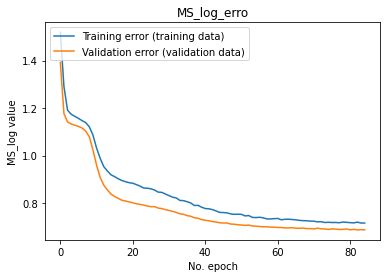

In [38]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training error (training data)')
plt.plot(history.history['val_loss'], label='Validation error (validation data)')
plt.title('MS_log_erro')
plt.ylabel('MS_log value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

### prediction on test data neural net

In [39]:
output_predictions = model.predict(X_pred).tolist()
output_predictions = [x.index(max(x))+1 for x in output_predictions]

submission = {}
submission['customer_id'] = test_ids
submission['churn_risk_score'] = output_predictions

pd.DataFrame(submission).to_csv('submission045.csv', index=False)

# Model - random forest classifier

In [40]:
## splitting data
X_train, X_test, y_train, y_test = train_test_split(X, raw_data['churn_risk_score'], test_size=0.25, random_state=0, shuffle=True)

# normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# normalization of test data
sc_test = StandardScaler()
X_pred = sc_test.fit_transform(X_pred)

In [41]:
# class_weights = get_class_weights(y_train)
class_weights = {1: 1.9394617266689969, 2: 2.677992277992278, 3: 0.7088400613183444, 4: 0.7283801522709372, 5: 0.7534012219959266}

In [42]:
y_train

4013     5
17235    4
26768    5
4357     3
36473    4
        ..
20757    3
32103    5
30403    1
21243    3
2732     3
Name: churn_risk_score, Length: 27744, dtype: int64

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

regress_model = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight=class_weights)
regress_model.fit(X_train, y_train)
#predict
y_pred = regress_model.predict(X_test)
# print("n_est = ", n_est, "f1_score = ", sklearn.metrics.f1_score([x.argmax()+1 for x in y_test], [x.argmax()+1 for x in y_pred], average="macro"))

In [44]:
y_pred, y_test

(array([4, 1, 4, ..., 5, 4, 3]),
 26492    3
 17536    2
 3478     4
 25818    3
 36421    3
         ..
 11441    4
 22401    4
 19221    5
 30792    4
 15759    3
 Name: churn_risk_score, Length: 9248, dtype: int64)

In [45]:
cnfm = sklearn.metrics.confusion_matrix([x for x in y_test], [x for x in y_pred])

In [46]:
sum(cnfm.diagonal()), len(y_test)

(5633, 9248)

In [47]:
sklearn.metrics.f1_score([x for x in y_test], [x for x in y_pred], average="macro")
# sklearn.metrics.f1_score(y_true, y_pred)

0.5813225552610387

In [ ]:
# score = 100 x metrics.f1_score(actual, predicted, average="macro")

In [ ]:
output_predictions = regress_model.predict(X_pred)

### prediction for random forest 

In [ ]:
submission = {}
submission['customer_id'] = test_ids
submission['churn_risk_score'] = [x for x in output_predictions]

pd.DataFrame(submission).to_csv('submission045.csv', index=False)

# Model - Gradient Boost

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
## splitting data
X_train, X_test, y_train, y_test = train_test_split(X, raw_data['churn_risk_score'], test_size=0.25, random_state=0, shuffle=True)

# normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# normalization of test data
sc_test = StandardScaler()
X_pred = sc_test.fit_transform(X_pred)

In [49]:
for x in [0.06]:
    gboost_model = GradientBoostingClassifier(n_estimators=400, learning_rate=x, 
                    max_depth=1, random_state=0).fit(X_train, y_train)
    print(x, "= ", gboost_model.score(X_test, y_test))

0.06 =  0.6423010380622838


In [ ]:
output_predictions = gboost_model.predict(X_pred)

In [ ]:
submission = {}
submission['customer_id'] = test_ids
submission['churn_risk_score'] = output_predictions

pd.DataFrame(submission).to_csv('submission011.csv', index=False)

# Model - adaboost classification (doesn't perform well)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
## splitting data
X_train, X_test, y_train, y_test = train_test_split(X, raw_data['churn_risk_score'], test_size=0.25, random_state=0, shuffle=True)

# normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# normalization of test data
sc_test = StandardScaler()
X_pred = sc_test.fit_transform(X_pred)

In [ ]:
for x in [100,200,300,400,500]:
    adaboost_model = AdaBoostClassifier(n_estimators=x, random_state=0)
    adaboost_model.fit(X_train, y_train)

    print(adaboost_model.score(X_test, y_test))

# Model - xgboost

In [ ]:
import xgboost as xg

In [ ]:
## splitting data
X_train, X_test, y_train, y_test = train_test_split(X, raw_data['churn_risk_score'], test_size=0.25, random_state=0, shuffle=True)

# normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# normalization of test data
sc_test = StandardScaler()
X_pred = sc_test.fit_transform(X_pred)

In [ ]:
xgb_model = xg.XGBClassifier(objective ='multi:softprob', random_state=0, verbose=0, scoring='f1', 
                             learning_rate=0.0001, subsample=0.5, n_jobs=-1, 
                             n_estimators=200, max_depth = 10)
xgb_model.fit(X_train, y_train)

# predict
# y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
# print(skm.accuracy_score(y_train, y_train_pred))

# printScore(y_train, y_train_pred)
# printScore(y_test, y_test_pred)

In [ ]:
print(sklearn.metrics.accuracy_score(y_test, y_test_pred))

In [ ]:
output_predictions = xgb_model.predict(X_pred)
submission = {}
submission['customer_id'] = test_ids
submission['churn_risk_score'] = output_predictions

pd.DataFrame(submission).to_csv('submission042.csv', index=False)

# Model - LightGBM 

In [54]:
## splitting data
X_train, X_test, y_train, y_test = train_test_split(X, raw_data['churn_risk_score'], test_size=0.25, random_state=0, shuffle=True)

# normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# normalization of test data
sc_test = StandardScaler()
X_pred = sc_test.fit_transform(X_pred)

In [59]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective='multi', class_weight=class_weights, random_state=1, n_jobs=-1, 
                               learning_rate=0.001, 
                               n_estimators=1000)
lgb_model.fit(X_train, y_train)

LGBMClassifier(class_weight={1: 1.9394617266689969, 2: 2.677992277992278,
                             3: 0.7088400613183444, 4: 0.7283801522709372,
                             5: 0.7534012219959266},
               learning_rate=0.001, n_estimators=1000, objective='multi',
               random_state=1)

In [60]:
x_pred = lgb_model.predict(X_test)
print(skm.accuracy_score(y_test, x_pred))

0.6330017301038062


In [61]:
output_predictions = lgb_model.predict(X_pred)
submission = {}
submission['customer_id'] = test_ids
submission['churn_risk_score'] = output_predictions

pd.DataFrame(submission).to_csv('submission046.csv', index=False)

# creating an ensamble 